In [2]:

#400131032

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
def present (image, fig):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=fig)
    plt.imshow(image)
    return image

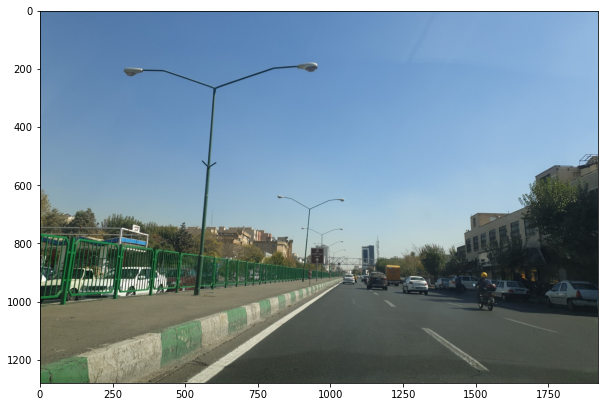

In [5]:
image = cv2.imread(r'C:\Users\Asus\Desktop\AUT\semister 3\vision\EX\2\CV_HW2\img1.jpg')
image = present(image, (10,8))

(<AxesSubplot:title={'center':'extreme bilateral + canny filter'}>,
 Text(0.5, 1.0, 'extreme bilateral + canny filter'))

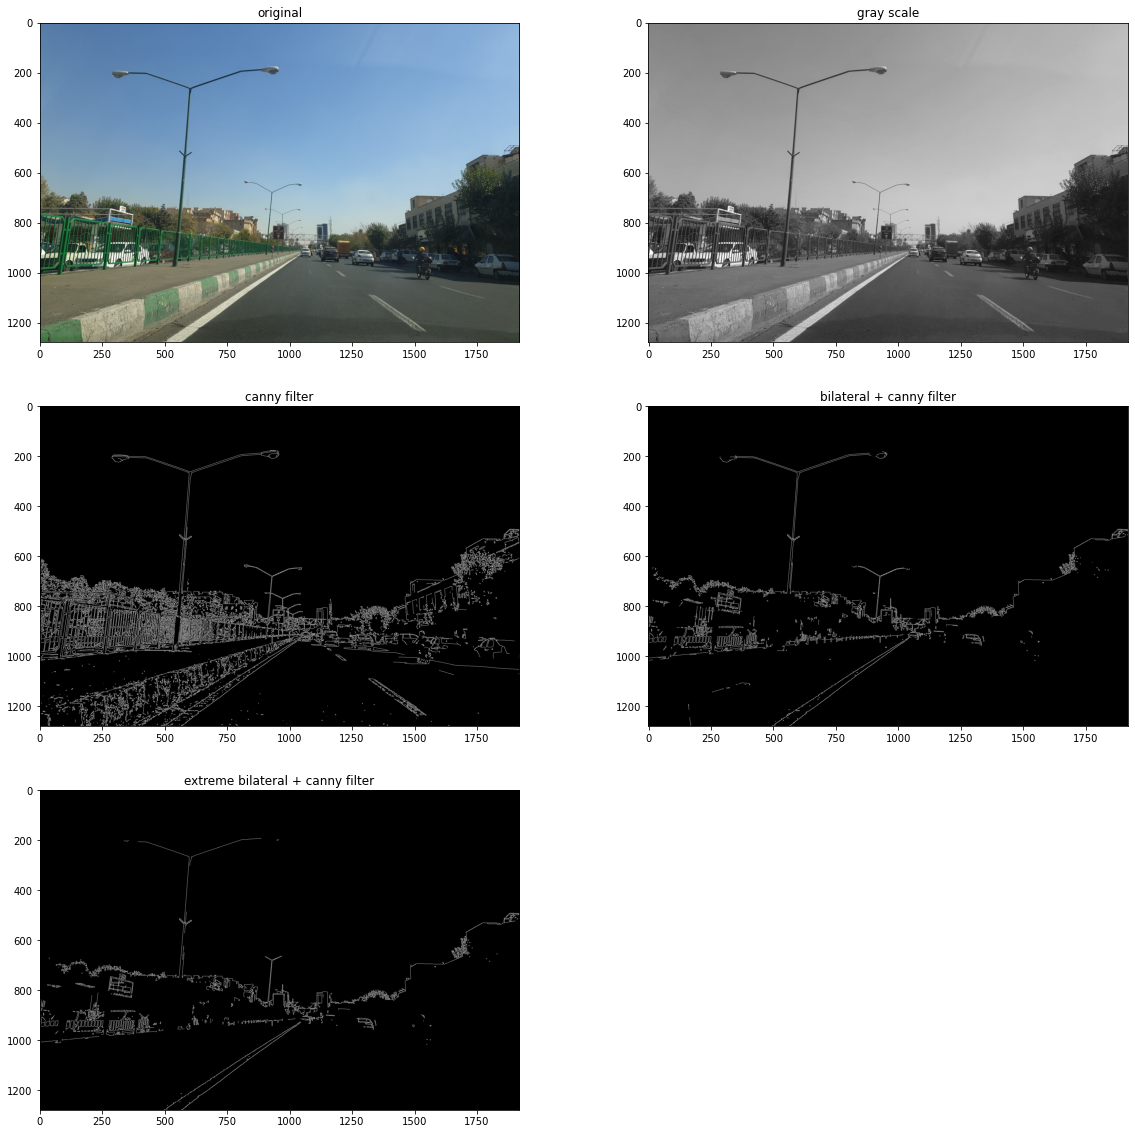

In [60]:

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

res1 = cv2.Canny(image=image_gray, threshold1=100, threshold2=200)

bilateral1 = cv2.bilateralFilter(image, 70, 140, 130)
bilateral2 = cv2.bilateralFilter(image, 70, 170, 160)

res3 = cv2.Canny(image=bilateral1, threshold1=100, threshold2=200)
res4 = cv2.Canny(image=bilateral2, threshold1=100, threshold2=200)

plt.figure(figsize=(20,20))
plt.subplot(321),plt.imshow(image,cmap = 'gray'),plt.title('original')
plt.subplot(322),plt.imshow(image_gray,cmap = 'gray'),plt.title('gray scale')
plt.subplot(323),plt.imshow(res1,cmap = 'gray'),plt.title('canny filter')
plt.subplot(324),plt.imshow(res3,cmap = 'gray'),plt.title('bilateral + canny filter')
plt.subplot(325),plt.imshow(res4,cmap = 'gray'),plt.title('extreme bilateral + canny filter')

(<AxesSubplot:title={'center':'extreme bilateral + canny filter'}>,
 Text(0.5, 1.0, 'extreme bilateral + canny filter'))

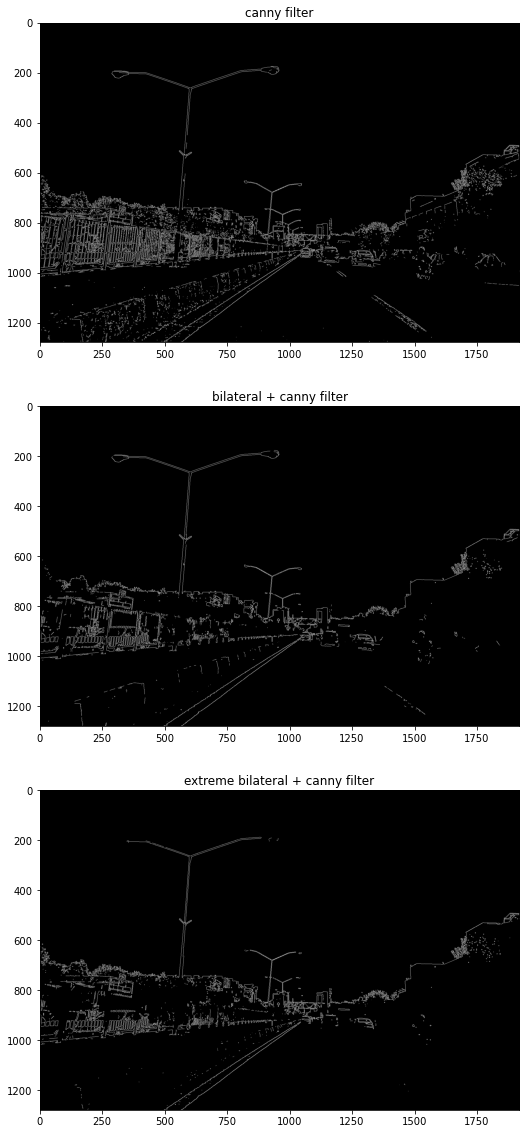

In [61]:
res1 = cv2.Canny(image=image_gray, threshold1=200, threshold2=255)

bilateral1 = cv2.bilateralFilter(image, 20, 80, 10)
bilateral2 = cv2.bilateralFilter(image, 230, 100, 100)
res3 = cv2.Canny(image=bilateral1, threshold1=200, threshold2=255)
res4 = cv2.Canny(image=bilateral2, threshold1=200, threshold2=255)

plt.figure(figsize=(20,20))
plt.subplot(311),plt.imshow(res1,cmap = 'gray'),plt.title('canny filter')
plt.subplot(312),plt.imshow(res3,cmap = 'gray'),plt.title('bilateral + canny filter')
plt.subplot(313),plt.imshow(res4,cmap = 'gray'),plt.title('extreme bilateral + canny filter')


In [38]:
def canny(image):
    image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    #smoothed_image = cv2.GaussianBlur(image_gray, (3, 1), 0)
    #bilateral1 = cv2.bilateralFilter(smoothed_image, 5, 5, 5)
    result = cv2.Canny(image=image_gray, threshold1=200, threshold2=255)
    return result 

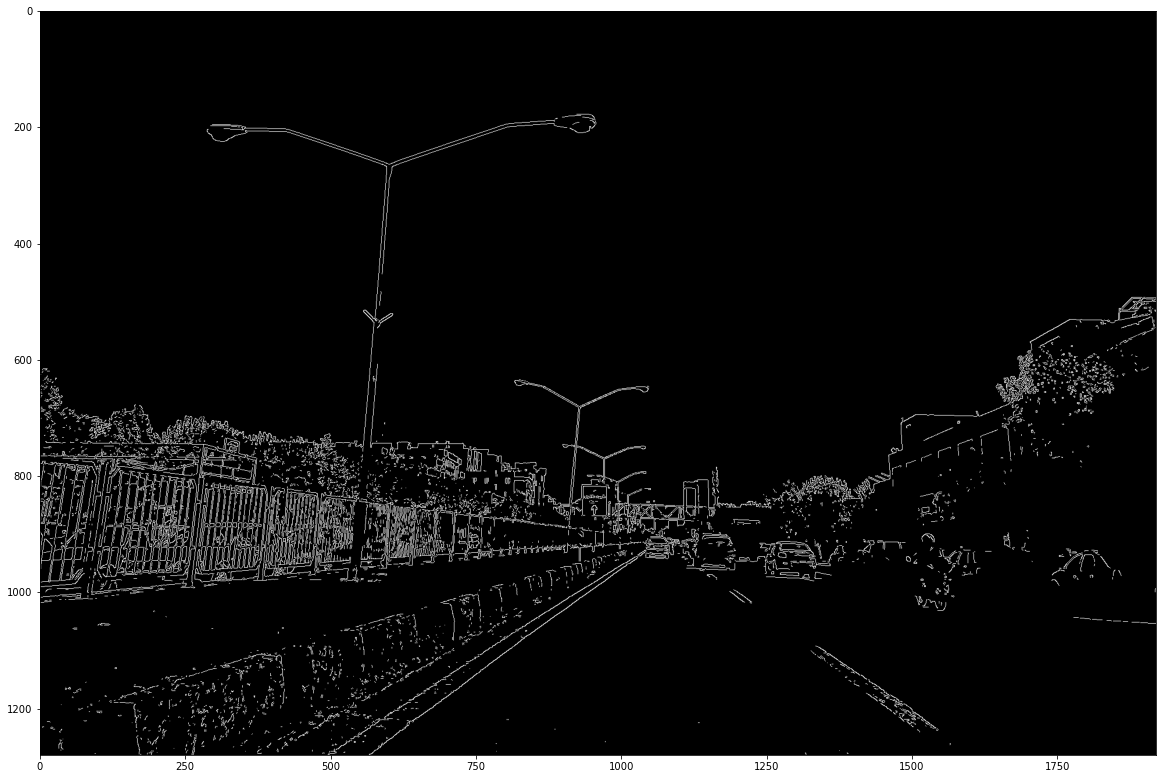

In [39]:
result = canny(image)
plt.figure(figsize=(20,20))
plt.imshow(result,cmap = 'gray')

In [40]:


def region_of_interest(image, height, width):
    mask_temp = np.zeros((image.shape[0],image.shape[1]), np.uint8)
    temp_height= int(height)
    temp_width= int(width) 
    points = np.array([[temp_width,temp_height], [0, int(image.shape[0])], [int(image.shape[1]), int(image.shape[0])]])
    mask= cv2.fillPoly(mask_temp, pts=[points], color=(255, 255, 255))
    #plt.imshow(mask)
    detected_output = cv2.bitwise_and(image, image, mask =  mask).astype(np.uint8) 
    return detected_output

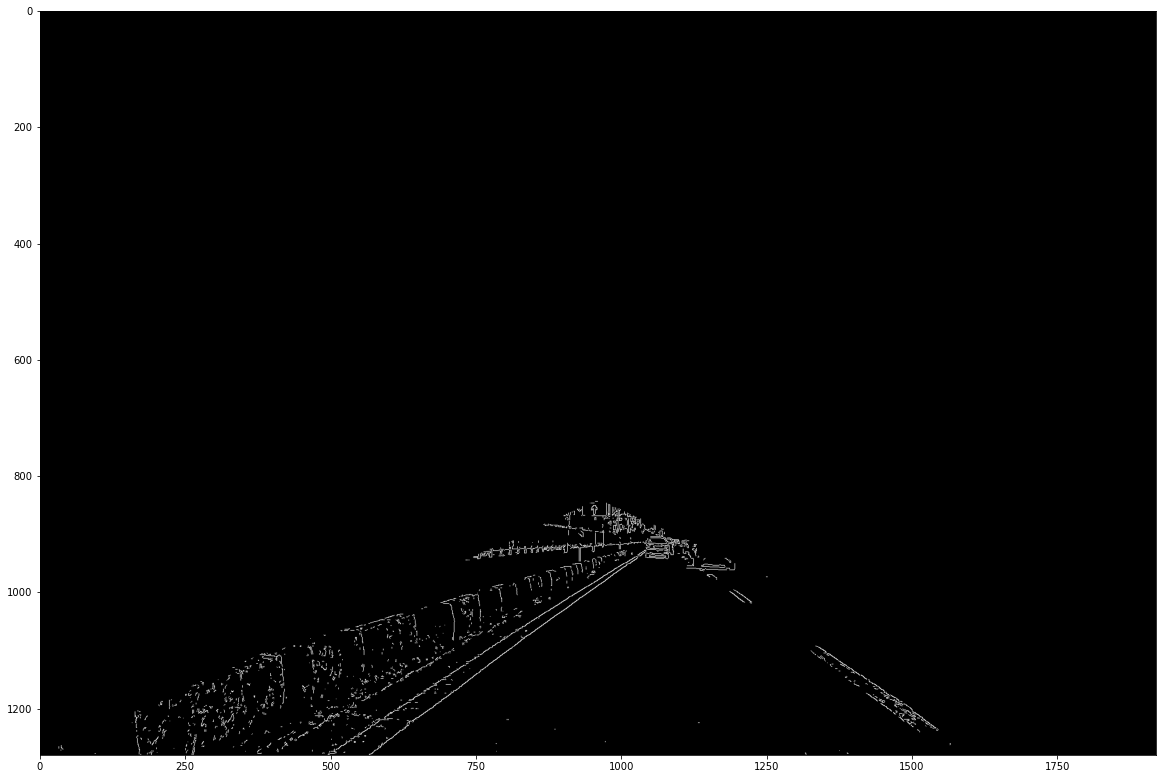

In [41]:
detected_output = region_of_interest(result, (image.shape[0]/2)+200 , image.shape[1]/2)
plt.figure(figsize=(20,20))
plt.imshow(detected_output,cmap = 'gray')

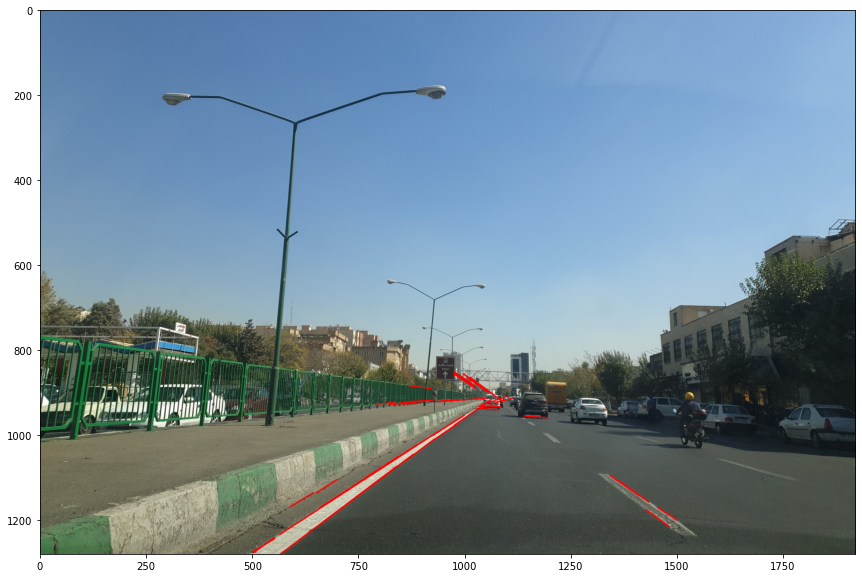

In [46]:
Rres = 1
Thetares = 1*np.pi/180
Threshold =10
minLineLength =45
maxLineGap = 8
lines_detectedd = np.copy(detected_output)
lines = cv2.HoughLinesP(lines_detectedd,Rres,Thetares,Threshold, np.array([]),minLineLength=minLineLength,maxLineGap=maxLineGap)
lines_detected_rgb = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2RGB)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(lines_detected_rgb,(x1,y1),(x2,y2),(0,0,255),2)


present(lines_detected_rgb, (15,10));

In [42]:
def canny (image):
    image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    smoothed_image = cv2.GaussianBlur(image_gray, (3, 3), 0)
    bilateral1 = cv2.bilateralFilter(smoothed_image, 20, 12, 10)
    result = cv2.Canny(image=bilateral1, threshold1=200, threshold2=255)
    return result 
def region_of_interest (image):
    mask_temp = np.zeros((image.shape[0],image.shape[1]), np.uint8)
    temp_height= int(result.shape[0]/2+ 200)
    temp_width= int(result.shape[1]/2) 
    points = np.array([[temp_width,temp_height], [0, int(result.shape[0])], [int(result.shape[1]), int(result.shape[0]) ]])
    mask= cv2.fillPoly(mask_temp, pts=[points], color=(255, 255, 255))
    detected_output = cv2.bitwise_and(image, image, mask =  mask).astype(np.uint8) 
    return detected_output
def draw_lines(img, lines, color=[255, 0, 0], thickness=7):
    
     #list to get positives and negatives values
    
    x_bottom_pos = []
    x_upperr_pos = []
    x_bottom_neg = []
    x_upperr_neg = []
    
    y_bottom = 1280
    y_upperr = 905
    
    #y1 = slope*x1 + b
    #b = y1 - slope*x1 
    #y = slope*x + b
    #x = (y - b)/slope
    
    slope = 0
    b = 0
    
    #get x upper and bottom to lines with slope positive and negative    
    for line in lines:
        for x1,y1,x2,y2 in line:
            if (x2-x1)==0:
                continue
            #test and filter values to slope
            if ((y2-y1)/(x2-x1)) > 0.5 and ((y2-y1)/(x2-x1)) < 0.8 :
                
                slope = ((y2-y1)/(x2-x1))
                b = y1 - slope*x1
                
                x_bottom_pos.append((y_bottom - b)/slope)
                x_upperr_pos.append((y_upperr - b)/slope)
                                      
            elif ((y2-y1)/(x2-x1)) < -0.5 and ((y2-y1)/(x2-x1)) > -0.8:
            
                slope = ((y2-y1)/(x2-x1))
                b = y1 - slope*x1
                
                x_bottom_neg.append((y_bottom - b)/slope)
                x_upperr_neg.append((y_upperr - b)/slope)
                
               
    #creating a new 2d array with means
    lines_mean = np.array([[int(np.mean(x_bottom_pos)), int(np.mean(y_bottom)), int(np.mean(x_upperr_pos)), int(np.mean(y_upperr))],
                           [int(np.mean(x_bottom_neg)), int(np.mean(y_bottom)), int(np.mean(x_upperr_neg)), int(np.mean(y_upperr))]])
    
    
    #Drawing the lines
    for i in range(len(lines_mean)):
        cv2.line(img, (lines_mean[i,0], lines_mean[i,1]), (lines_mean[i,2], lines_mean[i,3]), color, thickness)

In [43]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, image):

    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    lines_detected_rgb = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2RGB)
    for i in range(len(lines)):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(lines_detected_rgb,(x1,y1),(x2,y2),(0,0,255),2)
    present(lines_detected_rgb, (10,8))
    
    draw_lines(image, lines)
    present(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (10,8))

    return lines
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [47]:
from ipywidgets import interact
@interact(threshold= (0,100,1),min_line_len= (0,100,1) , max_line_gap= (0,100,1))
def line_detection (threshold =15, min_line_len= 40, max_line_gap=5):
    rho = 1
    theta = 1*np.pi/180
    edges = canny(image)
    detected_output = region_of_interest(edges )
    lines_detected2 = np.copy(detected_output)
    image_copy = np.copy(image)
    lines2 = hough_lines(lines_detected2, rho, theta, threshold, min_line_len, max_line_gap, image_copy)
    print('number of lines founded in picture : ',len(lines2))


interactive(children=(IntSlider(value=15, description='threshold'), IntSlider(value=40, description='min_line_…